In [ ]:
"""Apply Linear Regression to a real-world application. You can create your own data or obtain it from internet resources. Implement the following operations:
1.	Apply Linear Regression to single predictor (40%). 
a)	Estimate coefficients of the model and RSS
b)	Assessing the Accuracy of the Coefficient Estimates: SE and confidence interval with 95% probability.
c)	Hypothesis testing. Calculate t – statistic and p-value.
d)	Assess the Overall Accuracy of the Model: RSE, R- squared and correlation (r)

-------------------------------------------------------

2.	Apply Linear Regression to multiple predictors (40%). 
a)	Is at least one of the predictors X1, X2, …, Xp useful in predicting the response?
b)	Do all the predictors help to explain Y, or is only a subset of the predictors useful?
c)	How well does the model fit the data?
d)	Given a set of predictor values, what response value should we predict, and how accurate is our prediction? 
e)	Analyze Interactions between qualitative and quantitative Variables
f)	Analyze non-linear effects of predictors. 
"""

"""
Usefulness of Predictors: You can look at the p-values of the coefficients to assess the significance of each predictor. A low p-value (< 0.05) suggests that the predictor is statistically significant in explaining the target variable.
Subset of Useful Predictors: Techniques like backward elimination, forward selection, or even regularization methods (not covered in this simple implementation) can help identify a useful subset of predictors.
Model Fit: R-squared and adjusted R-squared values give you an idea of how well the model fits the data. A higher R-squared value indicates a better fit.
Predicting Response Values: The predict method can be used to predict response values for a given set of predictors. The standard error and confidence intervals can help assess the accuracy of these predictions.
Interactions and Non-linear Effects: The fit_interactions and fit_polynomial methods can be used to explore interactions between variables and non-linear effects of predictors on the response."""

In [104]:
import re
import pandas as pd
import numpy as np
pd.options.display.max_colwidth = None

In [148]:
df = pd.read_csv('binaaz_train.csv')

In [149]:

def extract_features(text):
    r_match = re.search(r"(.+?)\s+r\.", text)
    r_result = r_match.group(1) if r_match else None
    return r_result

df['rayon'] = df.apply(lambda x: extract_features(x['locations']), axis=1)

# ------------------------------

def to_float(x):
    return float(str(x).replace(' ', '').replace('m²', '').replace('м²', ''))

df['Sahə'] = df['Sahə'].apply(lambda x: to_float(x))

# ------------------------------

def floor_to_float(x):
    n=x.split()
    return float(int(n[0])/int(n[-1]))

df['Mərtəbə'] = df['Mərtəbə'].apply(lambda x: floor_to_float(x))

# ------------------------------

city_center_lat, city_center_lon = 40.4093, 49.8671
		
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees).
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    # Haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r

df['distance_city_center'] = df.apply(lambda row: haversine(row['longitude'], row['latitude'], city_center_lon, city_center_lat), axis=1)

# ------------------------------

df.dropna(subset=['Kupça', 'rayon'], inplace=True)
drop_cols = ["_id", "price_currency", "Ünvan", "description", "Yeniləndi", "locations", "latitude", "longitude", "poster", "title"]
df.drop(drop_cols, axis=1, inplace=True)

In [110]:
df.isna().sum()

price                       0
poster_type                 0
Mərtəbə                     0
Sahə                        0
Otaq sayı                   0
Kupça                   16775
İpoteka                     0
distance_city_center        0
rayon_Abşeron               0
rayon_Binəqədi              0
rayon_Nizami                0
rayon_Nərimanov             0
rayon_Nəsimi                0
rayon_Pirallahı             0
rayon_Qaradağ               0
rayon_Sabunçu               0
rayon_Suraxanı              0
rayon_Səbail                0
rayon_Xətai                 0
rayon_Xəzər                 0
rayon_Yasamal               0
seher_baki                  0
seher_xirdalan              0
dtype: int64

In [150]:
df['poster_type'] = df['poster_type'].map({'vasitəçi (agent)': 0, 'mülkiyyətçi': 1})
df['Kupça'] = df['Kupça'].map({'var': 1, 'yoxdur': 0})
df['İpoteka'] = df['İpoteka'].map({'var': 1, 'yoxdur': 0})

df = pd.get_dummies(df, columns=['rayon', 'seher'])

In [118]:
df

,price,poster_type,Mərtəbə,Sahə,Otaq sayı,Kupça,İpoteka,distance_city_center,rayon_Abşeron,rayon_Binəqədi,...,rayon_Pirallahı,rayon_Qaradağ,rayon_Sabunçu,rayon_Suraxanı,rayon_Səbail,rayon_Xətai,rayon_Xəzər,rayon_Yasamal,seher_baki,seher_xirdalan
0,300000,0,0.294118,135.0,3,1,0,1.645502,False,False,...,False,False,False,False,False,False,False,False,True,False
1,153000,0,0.625000,132.5,3,0,0,2.460140,False,False,...,False,False,False,False,False,False,False,False,True,False
2,171300,0,0.500000,115.0,2,0,0,7.325935,False,False,...,False,False,False,False,True,False,False,False,True,False
3,44500,0,0.500000,43.0,2,1,0,13.712757,True,False,...,False,False,False,False,False,False,False,False,True,False
4,89900,0,0.666667,65.0,2,1,0,4.888944,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69307,275000,0,0.750000,125.0,3,1,0,3.438036,False,False,...,False,False,False,False,False,True,False,False,True,False
69308,245000,0,0.777778,100.0,3,1,0,3.180191,False,False,...,False,False,False,False,False,True,False,False,True,False
69309,203000,0,0.666667,131.0,3,1,0,3.631134,False,False,...,False,False,False,False,False,False,False,False,True,False
69310,550000,0,1.000000,220.0,4,1,0,3.473610,False,False,...,False,False,False,False,False,False,False,False,True,False


In [151]:
import matplotlib.pyplot as plt

In [152]:
df = df[df['price'] > 30000]
df.shape

(61759, 23)

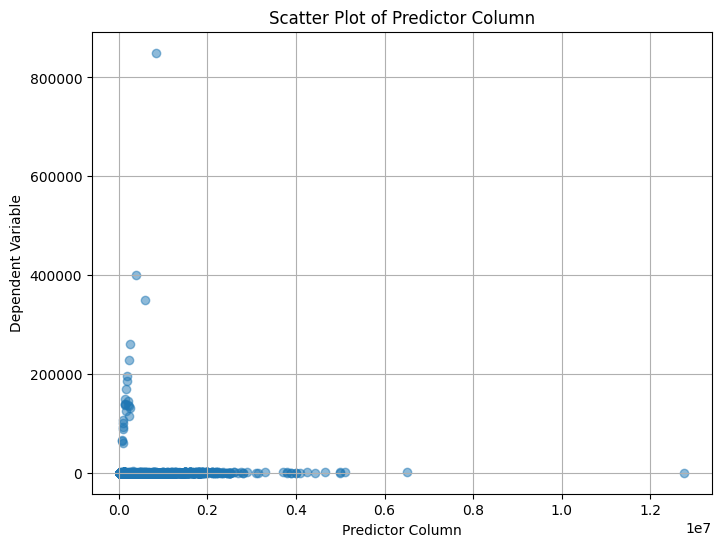

In [153]:
predictor_column = 'Sahə'
dependent_variable_column = 'price'

plt.figure(figsize=(8, 6))
plt.scatter(df['price'], df[predictor_column], alpha=0.5) 
plt.title('Scatter Plot of Predictor Column')
plt.xlabel('Predictor Column')
plt.ylabel('Dependent Variable')
plt.grid(True)
plt.show()

In [164]:
df.columns

Index(['price', 'poster_type', 'Mərtəbə', 'Sahə', 'Otaq sayı', 'Kupça',
       'İpoteka', 'distance_city_center', 'rayon_Abşeron', 'rayon_Binəqədi',
       'rayon_Nizami', 'rayon_Nərimanov', 'rayon_Nəsimi', 'rayon_Pirallahı',
       'rayon_Qaradağ', 'rayon_Sabunçu', 'rayon_Suraxanı', 'rayon_Səbail',
       'rayon_Xətai', 'rayon_Xəzər', 'rayon_Yasamal', 'seher_baki',
       'seher_xirdalan'],
      dtype='object')

In [167]:

import numpy as np
import scipy.stats as stats

class LinearRegressionFromScratch:
    def __init__(self):
        self.coefficients = []

    def fit(self, X, y):
        # Adding a column of ones for the intercept term
        X = np.c_[np.ones(X.shape[0]), X] 
        # Calculating coefficients using the Normal Equation
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        # Adding a column of ones for the intercept term
        X = np.c_[np.ones(X.shape[0]), X]
        return X.dot(self.coefficients)

    def rss(self, y, y_pred):
        # Calculating the Residual Sum of Squares
        return np.sum((y - y_pred) ** 2)

    def standard_error(self, X, y, y_pred):
        # Number of observations and predictors
        n, p = X.shape
        # Calculating the Residual Standard Error
        residual_std_error = np.sqrt(self.rss(y, y_pred) / (n - p - 1))
        # Calculating the standard error for each coefficient
        X = np.c_[np.ones(X.shape[0]), X]
        se = np.sqrt(np.diagonal(residual_std_error**2 * np.linalg.inv(X.T.dot(X))))
        return se

    def confidence_interval(self, coeff, se, alpha=0.05):
        # Calculating the t critical value for two tails
        t_crit = stats.t.ppf(1 - alpha/2, df=len(X) - len(coeff))
        # Calculating the confidence intervals
        lower_bound = coeff - t_crit * se
        upper_bound = coeff + t_crit * se
        return lower_bound, upper_bound

    def t_statistic(self, coeff, se):
        # Calculating the t-statistic for each coefficient
        return coeff / se

    def p_value(self, t_stat, n):
        # Calculating the p-value for each t-statistic
        return [2 * (1 - stats.t.cdf(np.abs(t), df=n-2)) for t in t_stat]

    def r_squared(self, y, y_pred):
        # Calculating the R-squared value
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        ss_res = self.rss(y, y_pred)
        return 1 - ss_res / ss_tot

    def correlation(self, X, y):
        # Calculating the Pearson correlation coefficient
        return np.corrcoef(X.T, y)[0, 1]

# Sample usage
# Split your data into X and y
X = df['Sahə'].values.reshape(-1, 1) # Predictor
y = df['price'].values # Target

np.random.seed(0) # For reproducibility
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))
train_indices = indices[:split]
test_indices = indices[split:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Initializing and training the model
model = LinearRegressionFromScratch()
model.fit(X_train, y_train)

# Making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Calculating metrics
rss = model.rss(y_test, y_pred_test)
se = model.standard_error(X_test, y_test, y_pred_test)
coeff_confidence_interval = model.confidence_interval(model.coefficients, se)
t_stat = model.t_statistic(model.coefficients, se)
p_val = model.p_value(t_stat, len(X_test))
r_squared_value = model.r_squared(y_test, y_pred_test)
correlation_value = model.correlation(X_test[:, 0], y_test)  # Only for single predictor
print(f'Coefficients: {model.coefficients}')
print(f'RSS: {rss}')
print(f'Standard Error: {se}')
print(f'Confidence Interval: {coeff_confidence_interval}')
print(f'T-Statistic: {t_stat}')
print(f'P-Value: {p_val}')
print(f'R-Squared: {r_squared_value}')
print(f'Correlation: {correlation_value}')


Coefficients: [2.00187320e+05 8.00016381e-01]
RSS: 426195013647959.25
Standard Error: [1.67667077e+03 8.60215280e-01]
Confidence Interval: (array([ 1.96901042e+05, -8.86007631e-01]), array([2.03473599e+05, 2.48604039e+00]))
T-Statistic: [119.39572408   0.9300188 ]
P-Value: [0.0, 0.352379529473557]
R-Squared: 0.00015469220262231964
Correlation: 0.015068443034799647


In [175]:
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import PolynomialFeatures

class LinearRegressionFromScratch:
    def __init__(self):
        self.coefficients = []

    def fit(self, X, y):
        X = np.c_[np.ones(X.shape[0]), X]  # Adding a column of ones for the intercept term
        self.coefficients = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    def predict(self, X):
        X = np.c_[np.ones(X.shape[0]), X]  # Adding a column of ones for the intercept term
        return X.dot(self.coefficients)

    def rss(self, y, y_pred):
        return np.sum((y - y_pred) ** 2)

    def standard_error(self, X, y, y_pred):
        n, p = X.shape
        residual_std_error = np.sqrt(self.rss(y, y_pred) / (n - p - 1))
        X = np.c_[np.ones(X.shape[0]), X]
        se = np.sqrt(np.diagonal(residual_std_error**2 * np.linalg.inv(X.T.dot(X))))
        return se

    def t_statistic(self, coeff, se):
        return coeff / se

    def p_value(self, t_stat, n):
        return [2 * (1 - stats.t.cdf(np.abs(t), df=n-2)) for t in t_stat]

    def r_squared(self, y, y_pred):
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        ss_res = self.rss(y, y_pred)
        return 1 - ss_res / ss_tot

    def fit_interactions(self, X):
        # This method is for fitting interactions between variables
        poly = PolynomialFeatures(interaction_only=True, include_bias=False)
        X_interact = poly.fit_transform(X)
        return X_interact

    def fit_polynomial(self, X, degree=2):
        # This method is for fitting non-linear (polynomial) effects
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly.fit_transform(X)
        return X_poly

import numpy as np
import pandas as pd  # Assuming pandas is used to load and manipulate the dataset

# Placeholder for loading your dataset
# df = pd.read_csv('your_dataset.csv')  # Load your dataset

# Separating features and target
X = df.drop('price', axis=1).values  # Assuming all other columns are predictors
y = df['price'].values

# Splitting the data into training and testing sets
np.random.seed(0)  # For reproducibility
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))  # 80% training, 20% testing
train_indices, test_indices = indices[:split], indices[split:]

X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

# Initializing the linear regression model
model = LinearRegressionFromScratch()

# Fitting the model with the training data
model.fit(X_train, y_train)

# Predicting the target for training and testing set
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Computing Residual Sum of Squares for the test set
rss = model.rss(y_test, y_pred_test)
print(f"Residual Sum of Squares (RSS): {rss}")

# Computing standard errors, t-statistics, and p-values
se = model.standard_error(X_test, y_test, y_pred_test)
t_stat = model.t_statistic(model.coefficients, se)
p_val = model.p_value(t_stat, len(X_test))
print(f"Standard Errors: {se}")
print(f"T-statistics: {t_stat}")
print(f"P-values: {p_val}")

# Computing R-squared for the test set
r_squared_value = model.r_squared(y_test, y_pred_test)
print(f"R-squared: {r_squared_value}")

Residual Sum of Squares (RSS): 2228986068275189.0
Standard Errors: [           nan 1.25296524e+04 1.47780373e+04 1.96978510e+00
 4.06361579e+03 8.92567887e+03 1.14399227e+04 7.63519809e+01
 4.62580285e+11 4.62580285e+11 4.62580285e+11 4.62580285e+11
 4.62580285e+11 4.62580285e+11 4.72976646e+11 4.72976646e+11
 4.62580285e+11 4.62580285e+11 4.62580285e+11 4.62580285e+11
 4.62580285e+11            nan            nan]
T-statistics: [            nan -7.63480225e+01  9.40039242e-01  7.04647427e-02
  2.66254521e+01  8.64456737e+00 -5.60123371e-01  4.01307334e+01
 -1.21534830e+06 -1.21534830e+06 -1.21534830e+06 -1.21534830e+06
 -1.21534830e+06 -1.21534830e+06 -1.18863408e+06 -1.18863408e+06
 -1.21534830e+06 -1.21534830e+06 -1.21534830e+06 -1.21534830e+06
 -1.21534830e+06             nan             nan]
P-values: [nan, 0.0, 0.34721581737160045, 0.9438249029395478, 0.0, 0.0, 0.57540544983897, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, nan, nan]
R-squared: -4.22915846

/var/folders/ls/65g9k4kd4_j8k3x277xdkd500000gn/T/ipykernel_40439/3341166521.py:24: RuntimeWarning: invalid value encountered in sqrt
  se = np.sqrt(np.diagonal(residual_std_error**2 * np.linalg.inv(X.T.dot(X))))


In [176]:
# If you want to include interactions or polynomial features:
X_train_interact = model.fit_interactions(X_train)
X_test_interact = model.fit_interactions(X_test)
model.fit(X_train_interact, y_train)  # Fit the model with interaction terms
# Or for polynomial features:
degree = 2  # Example: quadratic terms
X_train_poly = model.fit_polynomial(X_train, degree)
X_test_poly = model.fit_polynomial(X_test, degree)
model.fit(X_train_poly, y_train)  # Fit the model with polynomial features

LinAlgError: Singular matrix